
# Analytics y Big Data: Ciencia de los Datos aplicada al mundo de los negocios

Los datos en el mundo real suelen estar incompletos y tener inconsistencias. Por esto, es necesario preparar los datos antes de ejecutar modelos de analítica. En este primer laboratorio prepararemos datos de riesgo de crédito para que en los próximos laboratorios encontremos patrones valiosos para la toma de decisiones.
Para partir, descargamos las librerías a utilizar. Esto es necesario hacerlo la primera vez que queremos ejecutar estos códigos. Tenemos bibliotecas como numpy, que se utiliza para hacer operaciones matemáticas, o scikit-learn, diseñada para el aprendizaje de máquinas.


In [ ]:
!pip -q install numpy gensim scikit-learn

Luego es necesario importar las librerías con las que vamos a trabajar. Esto es necesario hacerlo siempre que queramos correr este código.

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import pandas.util.testing as tm
import matplotlib.pyplot as plt
import seaborn as sn
from pandas.api.types import is_numeric_dtype
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, KBinsDiscretizer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.feature_selection import SelectKBest, f_classif
np.set_printoptions(suppress=True)

#Subir un archivo de Google Drive

El siguiente paso es montar Google Drive para poder enlazar nuestra base de datos. De esta forma podemos cargar después nuestra base de datos creditSIM.xlsx (que tenemos que tener en una carpeta “Colab Notebooks” en nuestro Drive claramente identificada).

**Cuando corra la siguiente línea, siga las intrucciones indicando la cuenta de Google correspondiente y aceptando las condiciones.**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Una vez cargado nuestro drive, llamamos a nuestra base de datos:

In [ ]:
ruta_data_set = 'gdrive/My Drive/Colab Notebooks/Base_Fuga_DABI_M1.xlsx'
data_set = pd.read_excel(ruta_data_set)

Descripción de variables de la base de datos:

1.	FUGA: F=cliente fugado, NF= cliente activo (variable objetivo, última columna)
2.	CreditMes_T: Crédito en mes T
3.	CreditMes_T-1: Crédito en mes T-1
4.	CreditMes_T-2: Crédito en mes T-2
5.	NumTarjCred_T: Número de tarjetas de crédito en mes T
6.	NumTarjCred_T-1: Número de tarjetas de crédito en mes T-1
7.	NumTarjCred_T-2: Número de tarjetas de crédito en mes T-2
8.	Ingreso: Ingreso cliente
9.	Edad: Edad cliente
10.	NumTransWeb_T: Número de transacciones en web en mes T
11.	NumTransWeb_T-1: Número de transacciones en web en mes T-1
12.	NumTransWeb_T-2: Número de transacciones en web en mes T-2
13.	MargenComp_T: Margen del cliente para la compañía en mes T
14.	MargenComp_T-1: Mmargen del cliente para la compañía en mes T-1
15.	MargenComp_T-2: Margen del cliente para la compañía en mes T-2
16.	MargenComp_T-3: Margen del cliente para la compañía en mes T-3
17.	MargenComp_T-4: Margen del cliente para la compañía en mes T-4
18.	MargenComp_T-5: Margen del cliente para la compañía en mes T-5
19.	MargenComp_T-6: Margen del cliente para la compañía en mes T-6
20.	Telefono: La compañia posee el numero de telefono del cliente
21.	NivelEduc: Nivel Educacional del cliente
22.	Genero: Genero del cliente
23.	EstCivil: Estado civil del cliente
24.	Region: Region donde vive el cliente





# Análisis Exploratorio de Datos

El AED consiste en examinar los datos para entenderlos, ver relaciones entre variables y encontrar posibles inconsistencias. Para esto, se analiza estadística descriptiva y gráﬁcos.

## Estadística descriptiva

Para analizar el comportamiento de los datos de las variables numéricas, obtenemos la media, desviación estandar, mínimo, máximo y cuartiles. Mientras que para las variables categóricas obtenemos la cantidad de categorias de la variable (unique), la moda (top) y la frecuencia de de la moda (freq).

In [ ]:
data_set.describe(include='all').round(1)

,CreditMes_T,CreditMes_T-1,CreditMes_T-2,NumTarjCred_T,NumTarjCred_T-1,NumTarjCred_T-2,Ingreso,Edad,NumTransWeb_T,NumTransWeb_T-1,...,MargenComp_T-3,MargenComp_T-4,MargenComp_T-5,MargenComp_T-6,Telefono,NivelEduc,Genero,EstCivil,Region,FUGA
count,5603.0,5605.0,5605.0,5598.0,5603.0,5605.0,5605.0,5605.0,5603.0,5603.0,...,5605.0,5603.0,5604.0,5605.0,5605,5602,5605,5603,5605,5605
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,4,3,4,1,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,SI,UNI,M,CAS,RM,NF
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5605,3627,3895,2960,5605,4889
mean,1021484.8,632812.1,583796.3,0.8,0.8,0.8,1223802.4,35.9,5.2,3.9,...,253053.6,253046.6,260956.4,195991.5,NaN,NaN,NaN,NaN,NaN,NaN
std,115216.5,127733.6,80016.5,0.7,0.7,0.7,562272.8,9.2,11.3,8.5,...,2472.4,2546.6,1653.4,3001.6,NaN,NaN,NaN,NaN,NaN,NaN
min,912650.0,500000.0,500000.0,0.0,0.0,0.0,-975950.0,15.0,0.0,0.0,...,100000.0,157840.0,183560.0,137500.0,NaN,NaN,NaN,NaN,NaN,NaN
25%,990500.0,597200.0,562100.0,0.0,0.0,0.0,890450.0,29.0,0.0,0.0,...,252840.0,252960.0,260800.0,195380.0,NaN,NaN,NaN,NaN,NaN,NaN
50%,997700.0,604850.0,566150.0,1.0,1.0,1.0,1057650.0,33.0,0.0,1.0,...,252960.0,253040.0,260880.0,195640.0,NaN,NaN,NaN,NaN,NaN,NaN
75%,1014800.0,623300.0,577400.0,1.0,1.0,1.0,1362600.0,41.0,6.0,5.0,...,253260.0,253320.0,261100.0,196420.0,NaN,NaN,NaN,NaN,NaN,NaN


Ingreso negativo: -975950
Edad mayor: 131
Valores perdidos en las tarjetas de credito ya que deben tener 5605 datos y en algunas columnas existen menos

De la tabla anterior, podemos identificar VP (gracias a la fila *count*) e inconsistencias (gracias a las filas *min* y *max*), tales como una edad de 1970 o ingresos negativos.
También podemos como vienen los datos de cada variable, como se muestra a continuación:

In [ ]:
print(data_set)

      CreditMes_T  CreditMes_T-1  CreditMes_T-2  NumTarjCred_T  \
0       1031900.0         666500         608000            2.0   
1       1078700.0         634100         583250            0.0   
2       1076000.0         708800         621950            1.0   
3        995450.0         599900         564350            1.0   
4       1052150.0         609800         572450            1.0   
...           ...            ...            ...            ...   
5600     989600.0         596300         561650            0.0   
5601     990050.0         597200         562100            1.0   
5602     990050.0         596750         562100            0.0   
5603     990500.0         596750         562100            0.0   
5604     990500.0         597200         562100            2.0   

      NumTarjCred_T-1  NumTarjCred_T-2  Ingreso  Edad  NumTransWeb_T  \
0                 2.0                2  1050050    30            1.0   
1                 0.0                0   830600    38          

Una forma más cómoda de visualizar valores perdidos es la siguiente:

In [ ]:
data_set.isnull().sum()

CreditMes_T        2
CreditMes_T-1      0
CreditMes_T-2      0
NumTarjCred_T      7
NumTarjCred_T-1    2
NumTarjCred_T-2    0
Ingreso            0
Edad               0
NumTransWeb_T      2
NumTransWeb_T-1    2
NumTransWeb_T-2    0
MargenComp_T       2
MargenComp_T-1     1
MargenComp_T-2     0
MargenComp_T-3     0
MargenComp_T-4     2
MargenComp_T-5     1
MargenComp_T-6     0
Telefono           0
NivelEduc          3
Genero             0
EstCivil           2
Region             0
FUGA               0
dtype: int64

## Gráficos

Los gráficos nos permiten identificar patrones univariados y bivariados, visualizar los datos y valores atípicos. Veamos primero el *Gráfico de frecuencias* estándar para la variable edad:

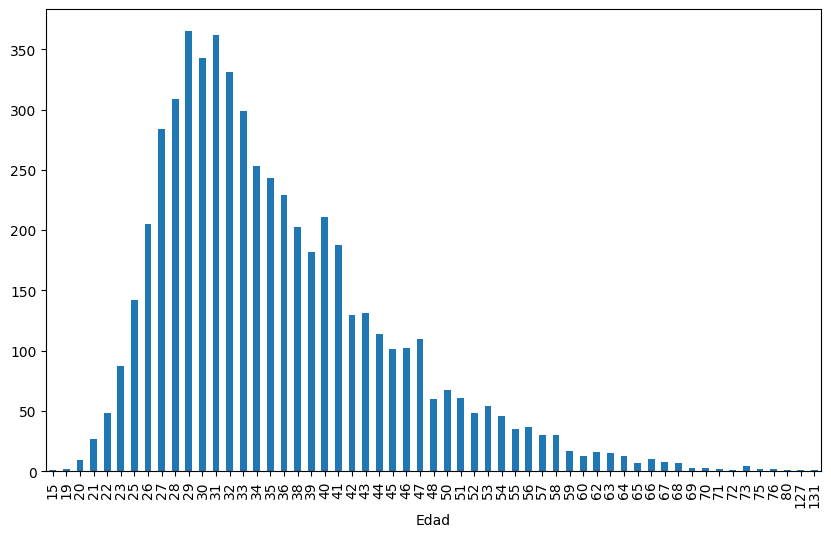

In [ ]:
data_set['Edad'].value_counts().sort_index().plot.bar(figsize=(10,6)) # Cambiado
plt.xlabel('Edad')
plt.show()

Vemos que existe 2 valores de 127 y 131 de edad I, lo que no es posible, por lo tanto tenemos que corregir esta inconsistencia. El histograma de puntos permite visualizar valores atípicos (*outliers*).

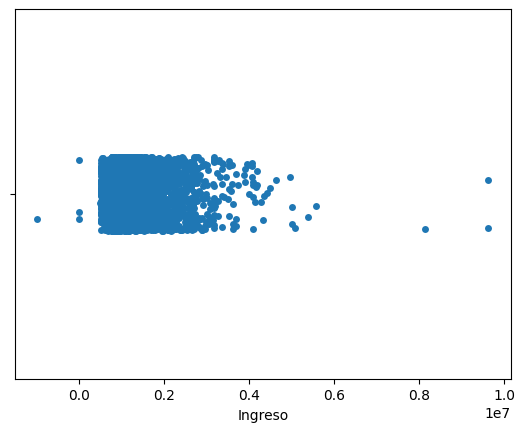

In [ ]:
sn.stripplot(x='Ingreso', data=data_set)
plt.show()

Todo lo anterior se asocia al **análisis univariado**, es decir, solo una variable con valor negativo. Podemos realizar **análisis bivariado** con el *Histograma color*, y así ver la relevancia de un atributo en relación a la variable objetivo.

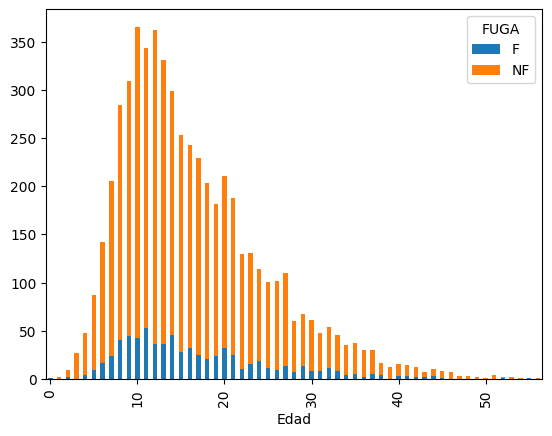

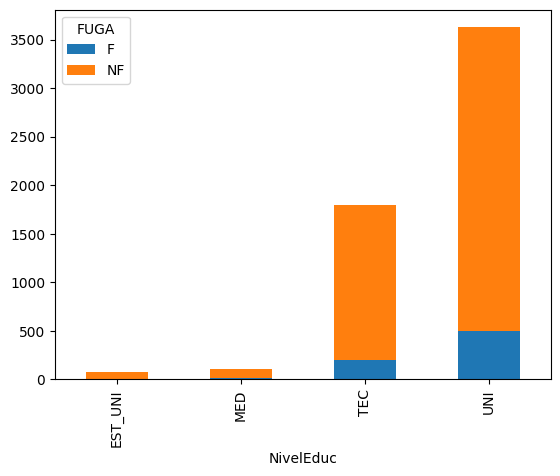

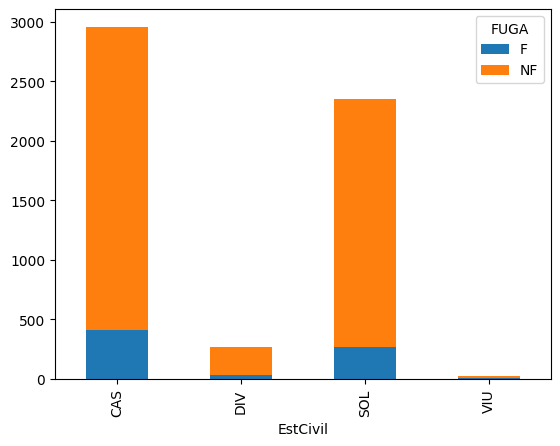

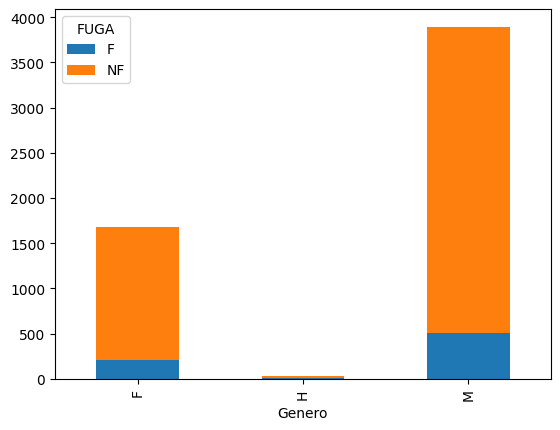

In [ ]:
data_set.groupby(['Edad', 'FUGA']).size().unstack().plot.bar(stacked=True) # Cambiado
plt.xscale('linear')
plt.show()
data_set.groupby(['NivelEduc', 'FUGA']).size().unstack().plot.bar(stacked=True) # Cambiado
plt.show()
data_set.groupby(['EstCivil', 'FUGA']).size().unstack().plot.bar(stacked=True) # Cambiado
plt.show()
data_set.groupby(['Genero', 'FUGA']).size().unstack().plot.bar(stacked=True) # Cambiado
plt.show()

En el primer gráfico vemos claramente que la variable (1) es relevante y (2) se comporta de forma esperada: a mayor años trabajando en el mismo empleo (nos movemos a la derecha por el eje X), los clientes son en promedio menos riesgosos (la proporción de azul en las barras va creciendo).

El segundo gráfico es menos claro en el patrón, pero da la impresión de que el riesgo es mayor en categorías como ed. superior completa (SupCom) e incompleta (SupInc) en relación a categorías con menor nivel educacional, como ed. básica. Este patrón es claramente inconsistente con lo que uno esperaría de la realidad, que es "a mayor nivel educacional, menor riesgo".

¿Qué podría estar causando esta inconsistencia? En riesgo de crédito existe el problema del *sesgo de selección*: nuestros datos consisten en solo los clientes que fueron aceptados por la entidad financiera. Probablemente, muchos clientes con un nivel edicuacional bajo fueron rechazados, y quedaron sólo aquellos que mostraban un alto potencial crediticio (ingreso alto, bajas deudas, etc.). Por otro lado, los clientes con estudios universitarios pueden haber sido aceptados sin solicitar mayores antecedentes, lo que puede explicar su mayor riesgo intrínsico.

Una variable inconsistente con la realidad debería ser descartada con fines predictivos ya que introduce un sesgo indeseado en el modelo. Si lo que buscamos es reemplazar el modelo original que acepta y rechaza clientes, tenderíamos a favorecer a potenciales clientes con un menor nivel educacional. Este análisis es muy importante ya que la máquina no puede hacerlo (no sabe lo que se espera de una variable).

Cuando los patrones no son muy claros, podemos hacer el histograma color con proporciones en vez de conteos:

In [ ]:
data_set.groupby(['AgnosEmpleo', 'VarObj']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot.bar(stacked=True)
plt.xscale('linear')
plt.show()
data_set.groupby(['NivelEdu', 'VarObj']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot.bar(stacked=True)
plt.show()

KeyError: ignored

El *gráfico de cajas* o *box plot* es bastante útil como alternativa al histograma color ya que puede entregar la misma información de la distribución pero en una sola dimensión (vertical). Esto permite presentar las diferentes distribuciones de forma separada y así es más fácil contrastar las diferencias:

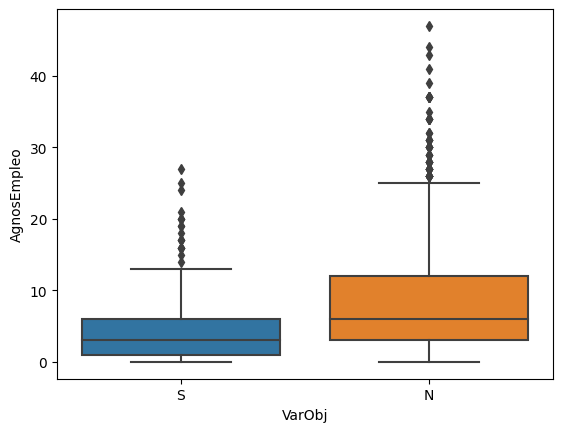

In [ ]:
sn.boxplot(x="VarObj", y="AgnosEmpleo", data=data_set)
plt.show()

Finalmente, el *gráfico de dispersión* (*scatter plot*) permite ver redundancia y relaciones bivariadas entre dos variables numéricas:

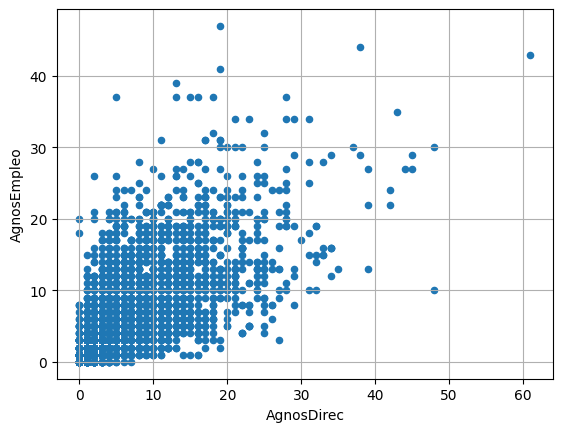

In [ ]:
data_set.plot(kind='scatter', x='AgnosDirec', y='AgnosEmpleo', grid=True)
plt.show()

# Limpieza de datos

La limpieza de datos es eliminar las incongruencias encontradas en el análisis exploratorio de datos, como valores perdidos y valores atípicos, para poder trabajar la base de datos sin que estos alteren los resultados.

Primero declaramos inconsistencias como valores perdidos, para luego imputar valores perdidos.


## Inconsistencias

La variable Edad no puede tener valores mayores a 100, dejando los mayores a este numero como valores nulos. Lo mismo se realiza para ingresos menores a 0.

In [ ]:
data_set.loc[data_set['Ingreso'] < 1, ['Ingreso']] = np.nan # Cambiado
data_set.loc[data_set['Edad'] > 100, ['Edad']] = np.nan # Cambiado

**texto en negrita**## Imputar valores perdidos

Para hacernos cargo de los valores perdidos, proponemos tres alternativas (solo la primera se implementa; las restantes se presentan por completitud).

**Alternativa 1: Remplazo por mediana / moda**

Esta alternativa la utilizamos cuando los valores perdidos son menores al 5% del total de los datos. Reemplazamos por la mediana en las variables numéricas (la media también se puede utilizar):

In [ ]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5605 entries, 0 to 5604
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditMes_T      5603 non-null   float64
 1   CreditMes_T-1    5605 non-null   int64  
 2   CreditMes_T-2    5605 non-null   int64  
 3   NumTarjCred_T    5598 non-null   float64
 4   NumTarjCred_T-1  5603 non-null   float64
 5   NumTarjCred_T-2  5605 non-null   int64  
 6   Ingreso          5601 non-null   float64
 7   Edad             5603 non-null   float64
 8   NumTransWeb_T    5603 non-null   float64
 9   NumTransWeb_T-1  5603 non-null   float64
 10  NumTransWeb_T-2  5605 non-null   int64  
 11  MargenComp_T     5603 non-null   float64
 12  MargenComp_T-1   5604 non-null   float64
 13  MargenComp_T-2   5605 non-null   int64  
 14  MargenComp_T-3   5605 non-null   int64  
 15  MargenComp_T-4   5603 non-null   float64
 16  MargenComp_T-5   5604 non-null   float64
 17  MargenComp_T-6

In [ ]:
# Cambiados por la mediana, variables numéricas menores al 5%
data_set['CreditMes_T'].fillna(data_set['CreditMes_T'].median(skipna =True), inplace=True)
data_set['NumTarjCred_T'].fillna(data_set['NumTarjCred_T'].median(skipna =True), inplace=True)
data_set['NumTarjCred_T-1'].fillna(data_set['NumTarjCred_T-1'].median(skipna =True), inplace=True)
data_set['NumTransWeb_T'].fillna(data_set['NumTransWeb_T'].median(skipna =True), inplace=True)
data_set['NumTransWeb_T-1'].fillna(data_set['NumTransWeb_T-1'].median(skipna =True), inplace=True)
data_set['MargenComp_T'].fillna(data_set['MargenComp_T'].median(skipna =True), inplace=True)
data_set['MargenComp_T-1'].fillna(data_set['MargenComp_T-1'].median(skipna =True), inplace=True)
data_set['MargenComp_T-4'].fillna(data_set['MargenComp_T-4'].median(skipna =True), inplace=True)
data_set['MargenComp_T-5'].fillna(data_set['MargenComp_T-5'].median(skipna =True), inplace=True)

# Cambiados por la moda, por ser variables categóricas
mode1 = data_set['NivelEduc'].mode() # Cambiado
data_set['NivelEduc'].fillna(mode1[0], inplace=True)

mode2 = data_set['EstCivil'].mode() # Cambiado
data_set['EstCivil'].fillna(mode2[0], inplace=True)

# Cambiar
data_set['Ingreso'].fillna(data_set['Ingreso'].median(skipna =True), inplace=True) # Cambiado
data_set['Edad'].fillna(100, inplace=True) # Cambiado


In [ ]:
data_set.head()

,CreditMes_T,CreditMes_T-1,CreditMes_T-2,NumTarjCred_T,NumTarjCred_T-1,NumTarjCred_T-2,Ingreso,Edad,NumTransWeb_T,NumTransWeb_T-1,...,MargenComp_T-3,MargenComp_T-4,MargenComp_T-5,MargenComp_T-6,Telefono,NivelEduc,Genero,EstCivil,Region,FUGA
0,1031900.0,666500,608000,2.0,2.0,2,1050050.0,30.0,1.0,0.0,...,252700,252800.0,260700.0,195120,SI,UNI,M,SOL,RM,NF
1,1078700.0,634100,583250,0.0,0.0,0,830600.0,38.0,0.0,0.0,...,252800,252860.0,260780.0,196480,SI,TEC,F,CAS,RM,NF
2,1076000.0,708800,621950,1.0,1.0,1,980700.0,25.0,0.0,0.0,...,252840,252580.0,260200.0,195380,SI,UNI,F,SOL,RM,NF
3,995450.0,599900,564350,1.0,1.0,1,1178300.0,46.0,0.0,0.0,...,253160,253280.0,261220.0,197040,SI,TEC,M,CAS,RM,NF
4,1052150.0,609800,572450,1.0,1.0,1,868600.0,55.0,6.0,3.0,...,253140,253040.0,260920.0,196040,SI,MED,F,SOL,RM,NF


Reemplazamos por la moda en las variables categóricas (esto es solo por completitud ya que "NivelEdu" será descartada):

In [ ]:
mode = data_set['NivelEduc'].mode()
data_set['NivelEduc'].fillna(mode[0], inplace=True)

**Alternativa 2: Eliminación de casos (filas)**

Esta alternativa también la podemos utilizar cuando los valores perdidos son menores al 5% del total de los datos y tenemos una gran cantidad de registros. La ventaja es que no inventamos valores como en el caso anterior pero perdemos la información de las otras variables en la fila. La ventaja es que se puede implementar de forma muy simple:


In [ ]:
data_set = data_set.dropna(axis=0, how='any')

**Alternativa 3: Imputación múltiple**

La imputación múltiple consiste en rellenar todos los valores faltantes de forma simultánea utilizando simulación. La idea es respetar tanto las distribuciones de cada variable como las correlaciones entre ellas. Es lo más sofisticado que sugerimos, y es altamente recomendable cuando tenemos una base de datos pequeña/mediana, y un porcentaje más alto de valores perdidos (digamos, 5% a 30%). Nota: este método no suele funcionar para variables categóricas (hay que reemplazarlas por la moda antes).



In [ ]:
imp = IterativeImputer(max_iter=10, random_state=12700)
num = data_set.select_dtypes(include=["number"])
cat = data_set.select_dtypes(exclude=["number"])
names = num.columns
num = pd.DataFrame(imp.fit_transform(num))
num.columns = names
data_set = pd.concat([num, cat], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Corroboramos que no existan valores perdidos en la base de datos:

In [ ]:
data_set.isnull().sum()

CreditMes_T        0
CreditMes_T-1      0
CreditMes_T-2      0
NumTarjCred_T      0
NumTarjCred_T-1    0
NumTarjCred_T-2    0
Ingreso            0
Edad               0
NumTransWeb_T      0
NumTransWeb_T-1    0
NumTransWeb_T-2    0
MargenComp_T       0
MargenComp_T-1     0
MargenComp_T-2     0
MargenComp_T-3     0
MargenComp_T-4     0
MargenComp_T-5     0
MargenComp_T-6     0
Telefono           0
NivelEduc          0
Genero             0
EstCivil           0
Region             0
FUGA               0
dtype: int64

Antes de continuar, eliminamos la variable ID ya que no aporta información al modelo (es un correlativo).

In [ ]:
del data_set['Telefono'] # Cambiado
del data_set['Region'] # Cambiado

# Transformación

La transformación de datos tiene tres objetivos principales: (1) mejorar la capacidad predictiva de una variable, (2) dar sentido matemático a las variables, y (3) igualar pesos relativos. Este tercer objetivo lo dejaremos para el final del laboratorio.


## Agregación

Si una variable es categórica, podeos agrupar alternativas. Para "NivelEdu", por ejemplo, podemos construir "SupCom" + "Posg" = "Completa". Esto permite reducir la cantidad de variables binarias cuando le damos sentido matemático. De todos modos, esta variable será descartada y lo presentamos sólo como un ejemplo de código.

In [ ]:
data_set['Genero'] = data_set['Genero'].replace('H', 'M') # Cambiado
data_set['NivelEduc'] = data_set['NivelEduc'].replace('EST_UNI', 'UNI') # Cambiado





Si una variable es numérica, la agregación puede ser vista como la construcción de nuevas variables que resultan de la combinación de las originales. Por ejemplo, podemos sumar la deuda interna y externa del cliente, lo que nos da la deuda total. Con esto calculamos el ratio deuda versus ingreso, que representa el endeudamiento real del cliente:

DeudaIng = (DeudaInt + DeudaExt)/Ingreso


In [ ]:
data_set['Credito_Total'] = (data_set['CreditMes_T'] + data_set['CreditMes_T-1'] + data_set['CreditMes_T-2'])
data_set['Credito/Ing'] = data_set['Credito_Total']/data_set['Ingreso']

# data_set['NumTarjCred_Total'] = [for i in data_set.loc[:, 'NumTarjCred_T':'NumTarjCred_T-2'].max()] # Pendiente

data_set['NumTransWeb_Total'] = (data_set['NumTransWeb_T'] + data_set['NumTransWeb_T-1'] + data_set['NumTransWeb_T-2'])
data_set['MargenComp_Total'] = (data_set['MargenComp_T'] + data_set['MargenComp_T-1'] + data_set['MargenComp_T-2'])


## Transformación de Box-Cox (corrección de asimetrías)

Si las variables son asimétricas a la izquierda (la media está muy cerca de los valores más pequeños) podemos aplicar la función logaritmo para expandir la distribución de dentro hacia afuera. Primero veamos la distribución de variables asimétricas:

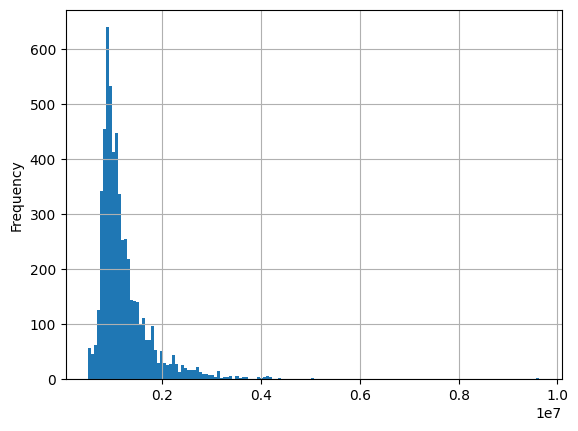

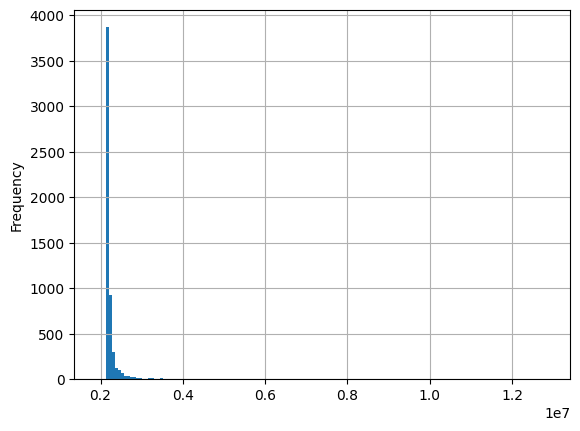

In [ ]:
data_set['Ingreso'].plot(kind='hist',bins=150, grid=True ) # Cambiado
plt.show()
data_set['Credito_Total'].plot(kind='hist',bins=150, grid=True ) # Cambiado
plt.show()
#data_set['Credito/Ing'].plot(kind='hist',bins=150, grid=True)
#plt.show()

Como vemos, las variables son efectivamente asimétricas, por lo que le aplicamos su logaritmo (sumar 1 evita que se indefina la función en caso de haber ceros):

In [ ]:
data_set['Ln_Ingreso'] = np.log(data_set['Ingreso']+1) # Cambiado
data_set['Ln_Credito_Total'] = np.log(data_set['Credito_Total']+1) # Cambiado

Ahora grafiquemos estas nuevas variables:

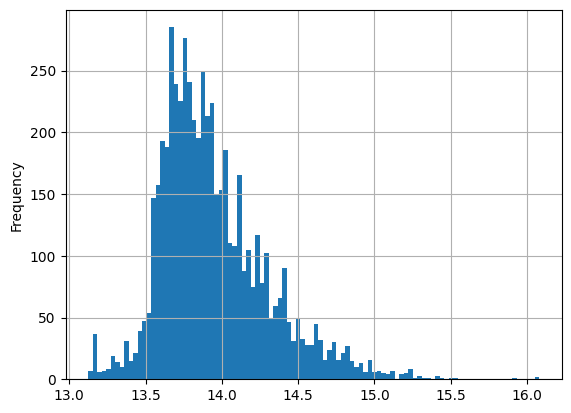

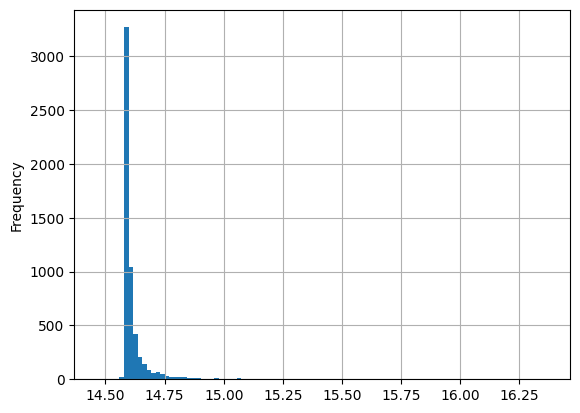

In [ ]:
data_set['Ln_Ingreso'].plot(kind='hist',bins=100, grid=True ) # Cambiado
plt.show()
data_set['Ln_Credito_Total'].plot(kind='hist',bins=100, grid=True ) # Cambiado
plt.show()

Como vemos en los gráficos anteriores, la asimetría se corrije y las distribuciones nuevas se acercan a una normal. Eliminamos las variables "Ingreso", "DeudaExt" y "DeudaInt" para quedarnos solo con sus logaritmos. Aprovechamos de eliminar "NivelEdu" por ser una variable sesgada.

In [ ]:
del data_set['Ingreso']
del data_set['Credito_Total']
# del data_set['NivelEdu']

## Dar sentido matemático a variables nominales

Transformamos las variables categóricas de la base de datos a variables binarias:

In [ ]:
data_set = pd.get_dummies(data_set, columns = ["VarObj"], drop_first = True)
data_set = pd.get_dummies(data_set, columns = ["Nacionalidad"]) #sin drop_first porque todos toman el mismo valor entonces la elimina
data_set.info()

# Filtros (Selección de atributos)

Los filtros se utilizan para elegir un subconjunto de variables relevantes eliminando las que generan ruido antes de correr los modelos. Veremos tres criterios:

## Inutilidad

Este criterio consiste en descartar las variables muy concentradas dentro de la base de datos.  Para esto calculamos la desviación estándar de las variables:

In [ ]:
data_set.std()

Descartamos Nacionalidad porque su desviación estándar es 0, es decir, la variable siempre toma el mismo valor.

In [ ]:
del data_set['Nacionalidad_N']

## Redundancia

Este criterio consiste en encontrar las variables que están muy correlacionadas entre sí, dejando solo una. Variables redundantes no aportan información nueva. Lo primero es visualizar la matriz de correlaciones bivariadas mediante un *heatmap*:

In [ ]:
corrmat = data_set.corr().abs()
f, ax = plt.subplots(figsize=(10, 7))
sn.heatmap(corrmat, square=True)

En la figura anterior vemos que la variable ingreso y ingreso2 estan altamente correlacionadas (0.986, como se observa en el código de abajo) por lo que tenemos que eliminar una. Podemos analizar la relevancia de ambas para saber cual elegir.

In [ ]:
corrmat.loc["Ln_Ingreso"]

## Relevancia

Finalmente, este criterio consiste en ver que variables de la matriz X están más correlacionadas con la variable objetivo Y. Utilizaremos el test chi cuadrado que calcula la relación entre dos variables nominales. Las variables numéricas las podemos discretizar.

Calcularemos la relevancia entre las variables redundantes "Ingreso" e "Ingreso2", las cuales discretizaremos en 5 *bins* o tramos:

In [ ]:
cut_points = data_set['Ln_Ingreso'].quantile([0, .2, .4, .6, .8, 1]) #el array es como quiero dividir los datos
Ingreso_binned = pd.cut(data_set['Ln_Ingreso'], bins =cut_points, include_lowest= True ) # bins puede ser un int tambien con el numero de diviciones en el intervalo y en base a eso lo divide
cut_points = data_set['Ln_Ingreso2'].quantile([0, .2, .4, .6, .8, 1])
Ingreso2_binned = pd.cut(data_set['Ln_Ingreso2'], bins =cut_points, include_lowest= True )

Ahora que tenemos las variables discretizadas "Ingreso_binned" e "Ingreso2_binned", procedemos a calcular el test chi cuadrado:

In [ ]:
tbl = pd.crosstab(index= Ingreso_binned,columns=data_set['VarObj_S'])
stat, p, dof, expected = chi2_contingency(tbl)
print('Valor chi cuadrado = %d' % stat)
print('P-valor =%f' % p)
tbl = pd.crosstab(index=Ingreso2_binned, columns=data_set['VarObj_S'])
stat, p, dof, expected = chi2_contingency(tbl)
print('Valor chi cuadrado = %d' % stat)
print('P-valor =%f' % p)

Finalmente, ambas tienen casi igual relevancia, lo que es esperado dada su alta correlación. Sin embargo, Ln_Ingreso2 es ligeramente más relevante (Valor chi cuadrado = 38 versus Valor chi cuadrado = 37), por lo que eliminaremos la variable Ingreso.

In [ ]:
del data_set['Ln_Ingreso']

**Selección de variables más relevantes**

Seleccionaremos las variables más relevantes con el método SelectKbest. Primero definimos como X las variables independientes y como Y la variable dependiente:

In [ ]:
X = data_set.loc[:, data_set.columns != 'VarObj_S']
y = data_set.loc[:, data_set.columns == 'VarObj_S']
X.shape #esto nos dice que tenemos 7 variables)

Ahora aplicamos la función SelectKBest con el test F de Fisher (opción por defecto, similar a ANOVA) para determinar las variables más relevantes. Alternativamente, se puede utilizar el test chi cuadrado ("chi2") si las variables son principalmente nominales:

In [ ]:
X_new = SelectKBest(k=5).fit(X, y.values.ravel())
#Veamos el test F y p-valor de todas las variables (no importa que diga k=5; es un número arbitrario)
print(X_new.scores_)
print(X_new.pvalues_)
#Vemos que todas las variables son relevantes para el problema (p-valor<0.05). No descartamos variables

# Guardar base de datos preprocesada

Descargamos la base de datos pre-procesada en Google Drive, y con esto el archivo quedará guardado en My Drive (Mi Unidad, si Drive está configurado en español). Guardaremos la base sin escalar ya que la escala original será necesaria después.



In [ ]:
data_set.to_excel('creditSIM_preprocess.xlsx',index=False)
!cp creditSIM_preprocess.xlsx "gdrive/My Drive/Colab Notebooks/"

**Normalización**

El último paso del preprocesamiento será escalar los datos entre 0 y 1 para llevarlos a una escala común. Esto no es necesario para todos los métodos de clasificación, como veremos en los laboratorios siguientes.

In [ ]:
VarObj = data_set['VarObj_S']
scaler = MinMaxScaler()
scaler_data = scaler.fit(data_set)
data_set_scaled = pd.DataFrame(scaler_data.transform(data_set), index=data_set.index, columns=data_set.columns)
data_set_scaled['VarObj_S'] = VarObj
print(data_set_scaled)